In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv(r'C:\\Users\\Bita\\Desktop\\data\\machine learning\\sec02-ml\\data\\car.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [19]:
cdf = df[['FUELCONSUMPTION_CITY', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
cdf.head()

,FUELCONSUMPTION_CITY,CYLINDERS,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,9.9,4,6.7,196
1,11.2,4,7.7,221
2,6.0,4,5.8,136
3,12.7,6,9.1,255
4,12.1,6,8.7,244


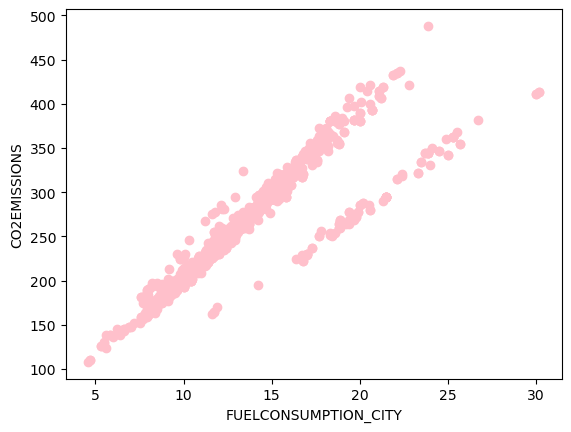

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='pink')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

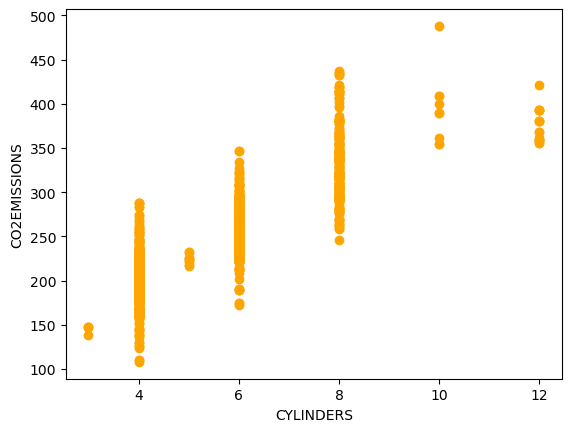

In [21]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='orange')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

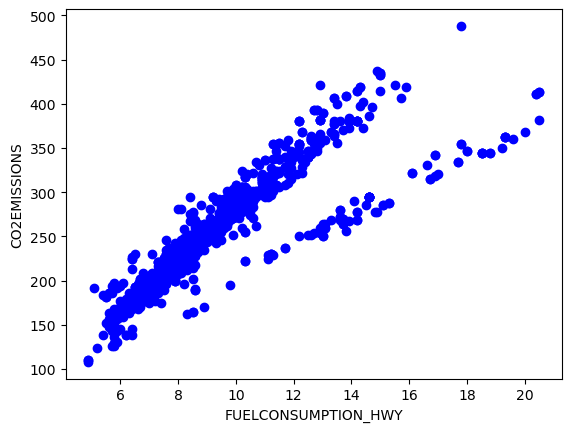

In [22]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [6]:
features = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS']
target = 'CO2EMISSIONS'

In [7]:
X = df[features]
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

------ StandardScaler ------
MAE: 17.114660270305972
MSE: 533.6157144606591
R2 : 0.8709497586381306

------ MinMaxScaler ------
MAE: 17.11466027030597
MSE: 533.6157144606588
R2 : 0.8709497586381307


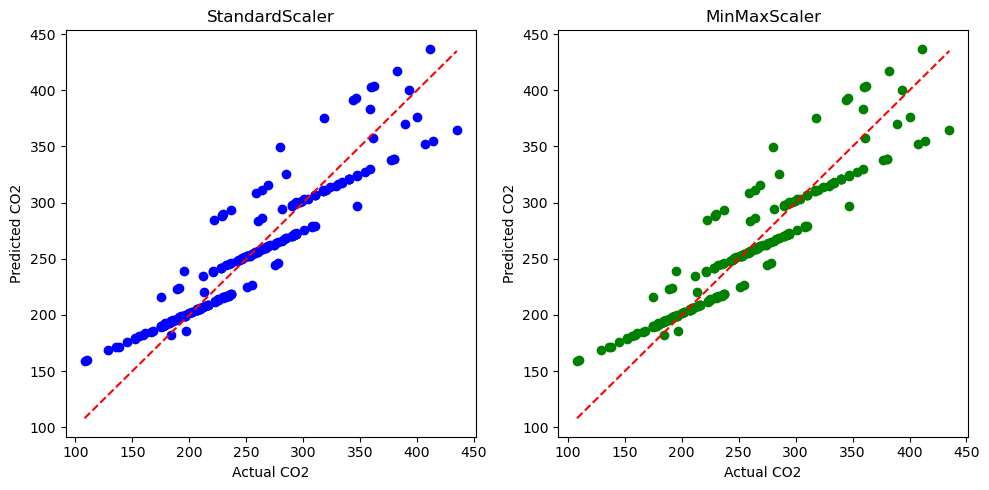

In [17]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

model_std = LinearRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)


minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)


print("------ StandardScaler ------")
print("MAE:", mean_absolute_error(y_test, y_pred_std))
print("MSE:", mean_squared_error(y_test, y_pred_std))
print("R2 :", r2_score(y_test, y_pred_std))

print("\n------ MinMaxScaler ------")
print("MAE:", mean_absolute_error(y_test, y_pred_minmax))
print("MSE:", mean_squared_error(y_test, y_pred_minmax))
print("R2 :", r2_score(y_test, y_pred_minmax))


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_std, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('StandardScaler')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_minmax, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('MinMaxScaler')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

plt.tight_layout()
plt.show()

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_scaled)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("📊 Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Model Evaluation:
MAE: 17.11
MSE: 533.62
R² Score: 0.87


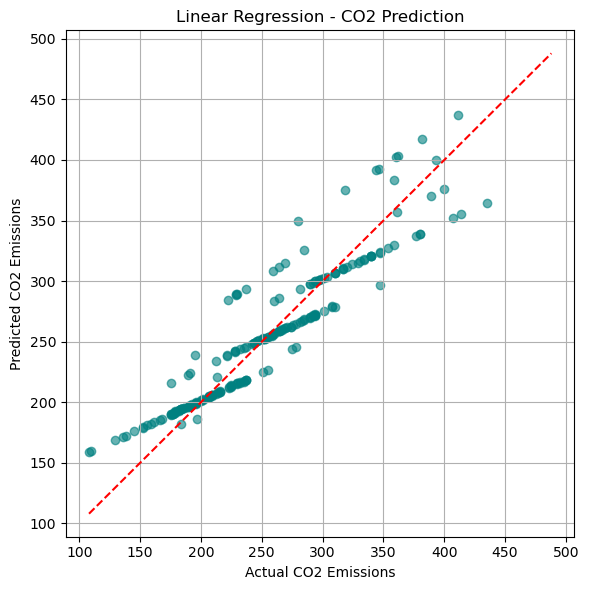

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Linear Regression - CO2 Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()